## 1. Import Library & Eksplorasi Dataset dengan Pandas

In [1]:
# Import library awal yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn")
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load dataset
data_januari = pd.read_csv("Volume Pengangkutan Sampah Di Kali Sungai Situ Waduk Bulan Januari Tahun 2021.csv", 
                           encoding="latin-1")
data_januari.tail()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
54338,1,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800,m,31,-
54339,1,PHB Rawa Teratai,Cakung,Jakarta Timur,700,m,31,-
54340,1,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000,m,31,-
54341,1,PHB Metropos KIP,Cakung,Jakarta Timur,1000,m,31,-
54342,1,PHB Warung Jengkol,Cakung,Jakarta Timur,400,m,31,2


In [3]:
# Melihat info dataset (tipe data, total record data, dll)
data_januari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54343 entries, 0 to 54342
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bulan                      54343 non-null  int64 
 1    titik_lokasi              54343 non-null  object
 2    kecamatan                 54343 non-null  object
 3    wilayah                   54343 non-null  object
 4    panjang/luas              53475 non-null  object
 5   satuan_panjang/luas        32388 non-null  object
 6   tanggal                    54343 non-null  int64 
 7   volume_sampah_perhari(m3)  54343 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [4]:
# Menghapus jarak spasi pada kolom dataset
data_januari.columns = data_januari.columns.str.replace(" ", "")

In [5]:
# Melihat nilai statistik deskriptif dari dataset untuk keseluruhan kolom
data_januari.describe(include="all")

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
count,54343.0,54343,54343,54343,53475,32388,54343.000000,54343
unique,NaN,1747,42,5,442,11,NaN,59
top,NaN,Saluran PHB Bungur,Kalideres,Jakarta Barat,1000,m,NaN,-
freq,NaN,62,2914,16430,6512,29884,NaN,15649
mean,1.0,NaN,NaN,NaN,NaN,NaN,16.000000,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,8.944354,NaN
min,1.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,1.0,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
50%,1.0,NaN,NaN,NaN,NaN,NaN,16.000000,NaN
75%,1.0,NaN,NaN,NaN,NaN,NaN,24.000000,NaN


Hasil keluaran diatas menandakan beberapa nilai-nilai dari statistik deskriptif dari kedua jenis data yakni numerik (tipe data int & float) dan kategorik (tipe data object/string) dan tentu saja setiap jenis data memiliki nilai deskriptif yang berbeda. Seperti misalnya jenis data numerik memiliki nilai deskriptif seperti count, mean, std (standard deviasi), maximum, minimum, quartil 1 (25%), quartil 2/median (50%) dan quartil 3 (75%). Sedangkan jenis data kategorik memiliki nilai deskriptif seperti count, unique, top dan freq (frekuensi data).

Sebagai contoh dapat dilihat pada penjelasan dibawah ini:

- Pada kolom titik_lokasi tidak memiliki nilai mean, standard deviasi, min, dll, tetapi memiliki nilai top, unique, freq, dll. Hal tersebut dikarenakan kolom titik_lokasi bersifat kategorik (karena memiliki tipe data string). Maka dari itu kolom titik_lokasi memiliki nilai top yakni PHB PLN, nilai freq adalah 62, dst.

- Sedangkan pada kolom tanggal tidak memiliki nilai top, freq, dll tetapi memiliki nilai mean, standard deviasi, min, max, dll. Hal tersebut dikarenakan kolom tanggal bersifat numerik. Nilai mean pada kolom tanggal adalah 16.0, nilai max adalah 31.0, nilai quartil 3 adalah 24.0, dst.

Berikut adalah kolom-kolom yang bersifat kategorik dan numerik:

- Kategorik: titik_lokasi, kecamatan, wilayah, panjang/luas, satuan_panjang/luas dan volume_sampah_perhari(m3).
- Numerik: bulan dan tanggal.

In [6]:
# Melihat tipe data dari masing-masing kolom yang ada di dalam dataframe
data_januari.dtypes

bulan                         int64
titik_lokasi                 object
kecamatan                    object
wilayah                      object
panjang/luas                 object
satuan_panjang/luas          object
tanggal                       int64
volume_sampah_perhari(m3)    object
dtype: object

In [7]:
# Melihat nama kolom yang ada di dalam dataframe
data_januari.columns

Index(['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas',
       'satuan_panjang/luas', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')

In [8]:
# Melihat jumlah rows dan kolom pada dataframe
data_januari.shape

(54343, 8)

In [9]:
"""
Menghitung nilai dari beberapa kolom (kecamatan, wilayah, satuan_panjang/satuan) 
dari yang sering muncul - tidak sering muncul di dalam dataframe
"""
print(data_januari["kecamatan"].value_counts())
print()

print(data_januari["wilayah"].value_counts())
print()

print(data_januari["satuan_panjang/luas"].value_counts())

Kalideres            2914
Tanjung Priok        2914
Penjaringan          2759
Cilincing            2542
Cengkareng           2480
Grogol Petamburan    2325
Cakung               2263
Kembangan            2232
Tamansari            1953
Pademangan           1891
Kebon Jeruk          1581
Tambora              1550
Kelapa Gading        1488
Palmerah             1395
Koja                 1395
Jatinegara           1364
Duren Sawit          1302
Pulo Gadung          1302
Jagakarsa            1178
Pasar Rebo           1147
Kramat Jati          1116
Makasar               961
Matraman              961
Ciracas               930
Tanah Abang           899
Gambir                899
Pancoran              868
Kebayoran Baru        837
Cilandak              837
Pasar Minggu          837
Kebayoran Lama        806
Setiabudi             775
Tebet                 744
Mampang Prapatan      713
Cipayung              651
Pesanggrahan          620
Sawah Besar           558
Senen                 527
Cempaka Puti

In [10]:
# Mengubah nama kolom satuan_panjang/luas menjadi satuan_panjang
rename_column_data = data_januari.rename(columns={"satuan_panjang/luas":"satuan_panjang"})

rename_column_data.columns

Index(['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas',
       'satuan_panjang', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')

In [11]:
# Memisahkan semua data yang memiliki kecamatan = Tanah Abang
data_tanah_abang = rename_column_data[rename_column_data.kecamatan == "Tanah Abang"]
data_tanah_abang.head(10)

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang,tanggal,volume_sampah_perhari(m3)
88,1,Kali / Sungai BKB Ciliwung Jembatan Jl Jendral...,Tanah Abang,Jakarta Pusat,1500,m,1,4.48
89,1,Kali / Sungai BKB Ciliwung Jembatan Jl.KH Mas ...,Tanah Abang,Jakarta Pusat,1000,m,1,4.48
90,1,kali / Sungai BKB Ciliwung Pintu Air karet,Tanah Abang,Jakarta Pusat,1000,m,1,4.48
91,1,kali / Sungai BKB Ciliwung Petamburan,Tanah Abang,Jakarta Pusat,1500,m,1,4
92,1,kali / Sungai BKB Ciliwung Stasiun Tanah Abang,Tanah Abang,Jakarta Pusat,1000,m,1,0
93,1,Kali / Sungai Cideng BI,Tanah Abang,Jakarta Pusat,1000,m,1,1
94,1,Kali / Sungai Cideng kraton,Tanah Abang,Jakarta Pusat,1000,m,1,2.24
95,1,Kali / Sungai Cideng Kebon Kacang Gedung jaya,Tanah Abang,Jakarta Pusat,1000,m,1,4.48
96,1,Kali / Sungai Cideng DEPAG,Tanah Abang,Jakarta Pusat,1000,m,1,2.24
97,1,Kali / Sungai Gendong Grand Indonesia/Pintu Ai...,Tanah Abang,Jakarta Pusat,1000,m,1,1


In [12]:
# Memisahkan semua data yang memiliki wilayah = Jakarta Timur
data_jaktim = rename_column_data[rename_column_data.wilayah == "Jakarta Timur"]
data_jaktim.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang,tanggal,volume_sampah_perhari(m3)
1366,1,Kali Cipinang Jembatan Radar AURI - Jembatan M...,Ciracas,Jakarta Timur,1800,m,1,-
1367,1,Kali Cipinang Jembatan Mekarsari - Jembatan Tipar,Ciracas,Jakarta Timur,1200,m,1,-
1368,1,Kali Cipinang - Jembatan Mekarsari - Jembatan ...,Ciracas,Jakarta Timur,1000,m,1,-
1369,1,Kali Cipinang Belakang SMA 99 -Jembatan Peti Mati,Ciracas,Jakarta Timur,2000,m,1,-
1370,1,Kali Cipinang Jembatan Peti Mati - Jembatan Pa...,Ciracas,Jakarta Timur,1000,m,1,-


In [13]:
# Memisahkan semua data yang memiliki satuan_panjang = Ha
data_Ha = rename_column_data[rename_column_data.satuan_panjang == "Ha"]
data_Ha.head(10)

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang,tanggal,volume_sampah_perhari(m3)
177,1,PHB Akses Marunda,Cilincing,Jakarta Utara,1,Ha,1,0
234,1,Waduk Kodamar,Kelapa Gading,Jakarta Utara,8,Ha,1,0
346,1,Waduk Sunter Selatan SPBU Shell,Tanjung Priok,Jakarta Utara,10,Ha,1,0
347,1,Waduk Sunter Selatan Pos Polisi,Tanjung Priok,Jakarta Utara,9,Ha,1,0
348,1,Waduk Sunter Selatan SPBU Pertamina,Tanjung Priok,Jakarta Utara,9,Ha,1,0
349,1,Waduk Sunter Utara Bisma,Tanjung Priok,Jakarta Utara,10,Ha,1,3
350,1,Waduk Sunter Utara Stadion BMW,Tanjung Priok,Jakarta Utara,10,Ha,1,3
352,1,Waduk Sunter Utara Daikin,Tanjung Priok,Jakarta Utara,10,Ha,1,3
400,1,Waduk Sunter Timur depan Gor,Tanjung Priok,Jakarta Utara,6.5,Ha,1,0
401,1,Waduk Sunter Timur depan Astra Container,Tanjung Priok,Jakarta Utara,6.5,Ha,1,0



## 2. Data Preprocessing

In [14]:
# Mengecek nilai kosong (NaN) dari masing-masing kolom di dataframe
data_januari.isnull().sum()

bulan                            0
titik_lokasi                     0
kecamatan                        0
wilayah                          0
panjang/luas                   868
satuan_panjang/luas          21955
tanggal                          0
volume_sampah_perhari(m3)        0
dtype: int64

In [15]:
# Mengecek apakah di dalam dataframe terdapat nilai duplikat/tidak
data_januari.duplicated().sum()

0

In [16]:
# Mengubah format penamaan kolom dari yang semula huruf kecil menjadi huruf gabungan (huruf besar & kecil)
data_januari = data_januari.rename(str.title, axis="columns")
data_januari.columns

Index(['Bulan', 'Titik_Lokasi', 'Kecamatan', 'Wilayah', 'Panjang/Luas',
       'Satuan_Panjang/Luas', 'Tanggal', 'Volume_Sampah_Perhari(M3)'],
      dtype='object')

In [17]:
# Menghapus karakter yang berada di kolom "Panjang/Luas"
data_januari["Panjang/Luas"] = data_januari["Panjang/Luas"].str.replace(r"\D", "")

In [18]:
# Mengahapus karakter "-" di kolom "Volume_Sampah_Perhari(M3)" dengan nilai NaN
data_januari["Volume_Sampah_Perhari(M3)"] = data_januari["Volume_Sampah_Perhari(M3)"].replace("-", np.nan)

data_januari.tail()

,Bulan,Titik_Lokasi,Kecamatan,Wilayah,Panjang/Luas,Satuan_Panjang/Luas,Tanggal,Volume_Sampah_Perhari(M3)
54338,1,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800,m,31,NaN
54339,1,PHB Rawa Teratai,Cakung,Jakarta Timur,700,m,31,NaN
54340,1,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000,m,31,NaN
54341,1,PHB Metropos KIP,Cakung,Jakarta Timur,1000,m,31,NaN
54342,1,PHB Warung Jengkol,Cakung,Jakarta Timur,400,m,31,2


Alasan saya mengganti icon "-" dengan nilai NaN adalah supaya dapat memudahkan ketika dalam mengganti data karena nilai NaN tersebut akan saya isi dengan nilai yang ada di statistik deskriptif yaitu nilai mean.

In [19]:
# Mengubah tipe data di kolom "Panjang/Luas" dari string menjadi float
data_januari[["Panjang/Luas"]] = data_januari[["Panjang/Luas"]].apply(pd.to_numeric)

In [20]:
# Mengubah tipe data pada kolom "Volume_Sampah_Perhari(M3)" dari string menjadi float
data_januari["Volume_Sampah_Perhari(M3)"] = pd.to_numeric(data_januari["Volume_Sampah_Perhari(M3)"], errors="coerce")

data_januari.tail()

,Bulan,Titik_Lokasi,Kecamatan,Wilayah,Panjang/Luas,Satuan_Panjang/Luas,Tanggal,Volume_Sampah_Perhari(M3)
54338,1,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800.0,m,31,NaN
54339,1,PHB Rawa Teratai,Cakung,Jakarta Timur,700.0,m,31,NaN
54340,1,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000.0,m,31,NaN
54341,1,PHB Metropos KIP,Cakung,Jakarta Timur,1000.0,m,31,NaN
54342,1,PHB Warung Jengkol,Cakung,Jakarta Timur,400.0,m,31,2.0


In [21]:
# Melihat nilai total dari masing-masing data yang ada di kolom "Satuan_Panjang/Luas"
data_januari["Satuan_Panjang/Luas"].value_counts()

m         29884
Ha         1302
M           861
H            93
HA           62
Hektar       31
m²           31
km           31
M³           31
m2           31
hektar       31
Name: Satuan_Panjang/Luas, dtype: int64

Berdasarkan hasil diatas dapat dilihat bahwa nilai data hektar (yang dilambangkan dengan Ha) memiliki banyak sekali penulisan yang berbeda-beda seperti H, HA, Hektar, dan hektar padahal semuanya memiliki satu kesatuan yaitu Ha. Maka dari itu saya akan menjadikan nilai data H, HA, Hektar, ataupun hektar menjadi Ha saja.

Selain itu nilai data seperti M dengan m atau yang memiliki nilai yang sejenis juga akan saya ubah.

Alasan saya mengubah data di kolom "Satuan_Panjang/Luas" walaupun kolom ini tidak saya gunakan untuk memprediksi tingkat pengangkutan volume sampah di setiap harinya adalah karena saya ingin melihat perbandingan data di kolom "Satuan_Panjang/Luas" melalui grafik batang dan saya tidak akan menghapus nilai NaN yang ada di kolom ini karena tujuan saya adalah untuk melihat perbandingan data melalui grafik batang.

In [22]:
# Mengganti nilai data yang mirip seperti Ha, m, dan m²

# Mengganti nilai "H", "HA", "Hektar", dan "hektar" menjadi "Ha" 
data_januari = data_januari.replace(to_replace =["H", "HA", "Hektar", "hektar"], value="Ha")

# Mengganti nilai "M" menjadi "m"
data_januari = data_januari.replace(to_replace = "M", value="m")

# Mengganti nilai "m2" menjadi "m²"
data_januari = data_januari.replace(to_replace = "m2", value="m²")

data_januari["Satuan_Panjang/Luas"].value_counts()

m     30745
Ha     1519
m²       62
km       31
M³       31
Name: Satuan_Panjang/Luas, dtype: int64

In [23]:
# Mengecek nilai NaN pada masing-masing kolom yang ada di dataframe
data_januari.isnull().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Panjang/Luas                   899
Satuan_Panjang/Luas          21955
Tanggal                          0
Volume_Sampah_Perhari(M3)    17703
dtype: int64

In [24]:
# Mengganti nilai NaN yang ada disetiap kolom di data_januari dengan nilai mean
mean = data_januari.mean()
data_januari = data_januari.replace(np.nan, mean)

data_januari.isnull().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Panjang/Luas                     0
Satuan_Panjang/Luas          21955
Tanggal                          0
Volume_Sampah_Perhari(M3)        0
dtype: int64

Berdasarkan hasil diatas, masih terdapat data kosong di kolom "Satuan_Panjang/Luas" sebanyak 21.955. Data kosong ini tidak akan saya hapus sebab kolom "Satuan_Panjang/Luas" tidak termasuk ke dalam rencana dalam memprediksi tingkat pengangkutan volume sampah karena variabel/kolom yang akan saya jadikan sebagai landasan untuk memprediksi adalah kolom "Tanggal" dan "Volume_Sampah_Perhari(M3)".

Selain itu berdasarkan informasi data_januari, saya juga akan menghapus kolom "Bulan" dikarenakan kolom ini (kolom "Bulan") tidak saya butuhkan di dalam penelitian ini karena sudah jelas data yang ada di dataset ini merupakan data-data yang di input di bulan Januari 2021.

In [25]:
# Menghapus kolom yang sudah tidak dibutuhkan yaitu kolom "Bulan"
data_januari = data_januari.drop(["Bulan"], axis=1)

In [26]:
# Mengecek nilai outliers untuk kolom "Panjang/Luas" dengan nilai quartil dan IQR
Q1 = data_januari["Panjang/Luas"].quantile(0.25)
Q3 = data_januari["Panjang/Luas"].quantile(0.75)

# Menghitung interquartile range maka rumusnya adalah quartil 3 (75%) - quartil 1 (25%)
IQR = Q3 - Q1

# Melihat ukuran (baris dan kolom) sebelum data yang outliers dibuang
print("Ukuran Data dari Kolom Panjang/Luas Sebelum Nilai Outliers Dibuang: ", data_januari.shape)

# Menghapus nilai outlier dari kolom "Panjang/Luas"
data_januari = data_januari[~((data_januari["Panjang/Luas"] < (Q1 - 1.5 * IQR)) | 
                              (data_januari["Panjang/Luas"] > (Q3 + 1.5 * IQR)))]

# Melihat ukuran (baris dan kolom) setelah data outliers dibuang dari kolom "Panjang/Luas"
print("Ukuran Data dari Kolom Panjang/Luas Setelah Nilai Outliers Dibuang: ", data_januari.shape)

Ukuran Data dari Kolom Panjang/Luas Sebelum Nilai Outliers Dibuang:  (54343, 7)
Ukuran Data dari Kolom Panjang/Luas Setelah Nilai Outliers Dibuang:  (43803, 7)


Berdasarkan hasil output diatas terdapat 10.540 data outlier dari kolom "Panjang/Luas" dan jika tidak dihapus dikhawatirkan akan membuat distribusi data di kolom Panjang/Luas tidak balanced/tidak seimbang terlebih jika dibuat sebuah grafik.

In [27]:
# Mengubah tipe data pada kolom "Panjang/Luas" dan "Volume_Sampah_Perhari(M3)" dari float menjadi integer
data_januari["Panjang/Luas"] = data_januari["Panjang/Luas"].astype(int)
data_januari["Volume_Sampah_Perhari(M3)"] = data_januari["Volume_Sampah_Perhari(M3)"].astype(int)

data_januari.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43803 entries, 0 to 54342
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Titik_Lokasi               43803 non-null  object
 1   Kecamatan                  43803 non-null  object
 2   Wilayah                    43803 non-null  object
 3   Panjang/Luas               43803 non-null  int32 
 4   Satuan_Panjang/Luas        32202 non-null  object
 5   Tanggal                    43803 non-null  int64 
 6   Volume_Sampah_Perhari(M3)  43803 non-null  int32 
dtypes: int32(2), int64(1), object(4)
memory usage: 2.3+ MB


## 3. Data Visualisasi serta Analisa per Grafik

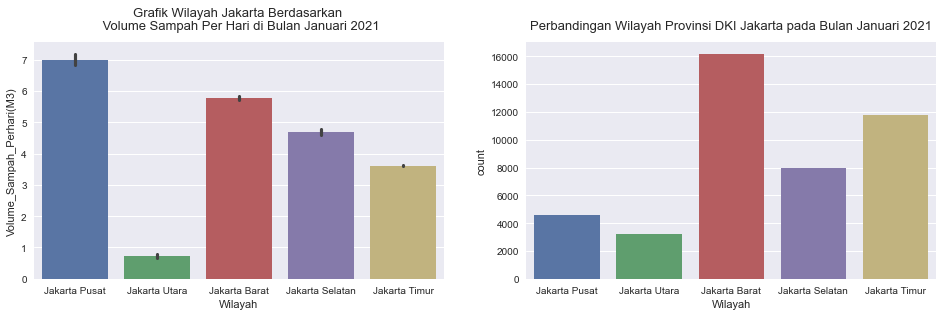

In [28]:
# Melihat perbandingan antar wilayah di Provinsi DKI Jakarta (berdasarkan volume sampah per hari)
plt.figure(figsize=(25, 20))

plt.subplot(4, 3, 1)
sns.barplot(x="Wilayah", y="Volume_Sampah_Perhari(M3)", data=data_januari)
plt.title("Grafik Wilayah Jakarta Berdasarkan \n Volume Sampah Per Hari di Bulan Januari 2021", 
          fontsize=13, pad=13)

plt.subplot(4, 3, 2)
sns.countplot(x="Wilayah", data=data_januari)
plt.title("Perbandingan Wilayah Provinsi DKI Jakarta pada Bulan Januari 2021", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik diagram diatas maka dapat diambil beberapa kesimpulan diantaranya:

1. Wilayah Jakarta Pusat memiliki volume sampah yang paling tinggi diantara wilayah yang lain sedangkan Wilayah Jakarta Utara memiliki volume sampah yang sangat sedikit. Jika diurutkan dalam hal volume sampah yang berhasil diangkut maka akan terjadi susunan seperti dibawah ini:
- Jakarta Pusat.
- Jakarta Barat.
- Jakarta Selatan.
- Jakarta Timur.
- Jakarta Utara.

2. Grafik kedua merupakan grafik yang memperlihatkan perbandingan Wilayah yang ada di Provinsi DKI Jakarta yang dihitung per Kecamatan tanpa ada keterkaitan dalam pengangkutan sampah per harinya. Wilayah Jakarta Barat memiliki nilai yang sangat tinggi yakni mencapai 16.000 sedangkan Wilayah Jakarta Utara memiliki nilai perhitungan yang sangat kecil yakni hanya mencapai kurang lebih 3.000 saja. Jika diurutkan maka hasilnya adalah sebagai berikut:
- Jakarta Barat.
- Jakarta Timur.
- Jakarta Selatan.
- Jakarta Pusat.
- Jakarta Utara.

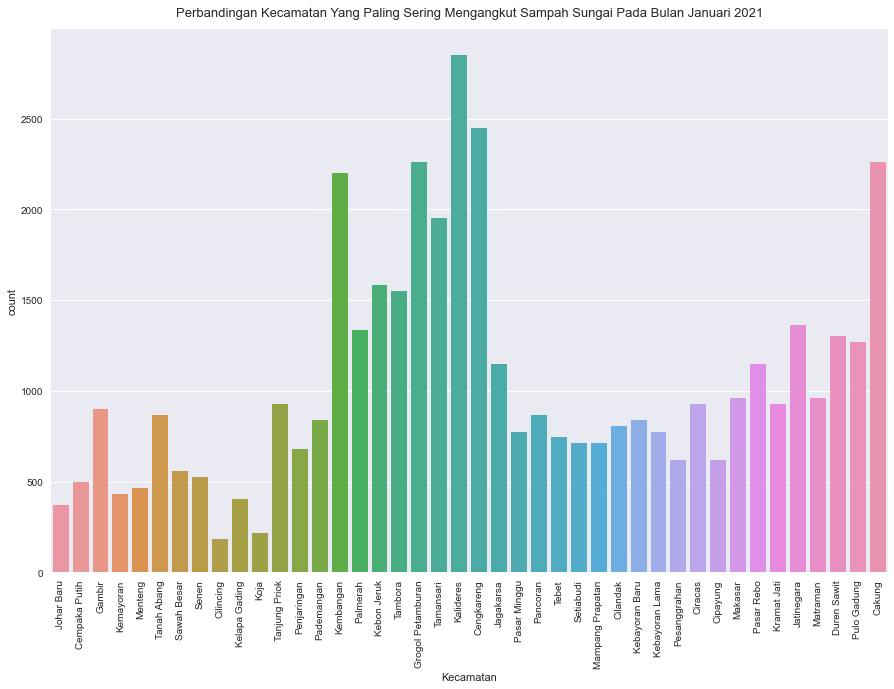

In [29]:
# Melihat perbandingan antar kecamatan dalam hal pengangkutan sampah yang ada di Provinsi DKI Jakarta
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)

sns.countplot(x="Kecamatan", data=data_januari)
plt.title("Perbandingan Kecamatan Yang Paling Sering Mengangkut Sampah Sungai Pada Bulan Januari 2021", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik diatas terkait perbandingan jumlah perhitungan total antar Kecamatan yang didasari oleh kolom Titik_Lokasi dalam menghasilkan/mengumpulkan volume sampah per harinya di Provinsi DKI Jakarta, maka dapat diambil kesimpulan sebagai berikut:

1. Kecamatan yang mempunyai nilai tertinggi adalah Kecamatan Kalideres yang memiliki nilai mencapai 2.656. Jumlah nilai tersebut tidak ada keterkaitannya dengan volume sampah per harinya melainkan didasarkan atas Titik_Lokasi dari sampah-sampah yang berhasil diangkut per harinya.
2. Kecamatan yang memiliki nilai tertinggi kedua setelah Kalideres adalah kecamatan Cengkareng yang memiliki nilai sebanyak 2.235 dan kecamatan tertinggi ketiga adalah kecamatan Cakung yang memiliki nilai mencapai 2.230.
3. Kecamatan yang memiliki titik lokasi terendah dalam hal pengangkutan sampah di Provinsi DKI Jakarta adalah Kecamatan Cilincing yang berada di Wilayah Jakarta Utara yang memiliki titik lokasi pengangkutan hanya 186 saja. Kalah tipis dari Kecamatan Koja (217) yang berada di Wilayah yang sama (Jakarta Utara).

Harus diingat bahwa perhitungan dalam memilih Kecamatan tertinggi sampai terendah didasarkan bukan dari volume sampah yang berhasil dingkut per harinya melainkan dari pengumpulan sampah di suatu titik lokasi tertentu saja seperti, kali, saluran penghubung (PHB), waduk, dll.

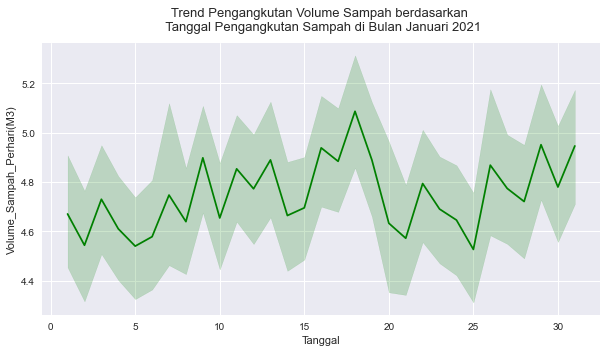

In [30]:
# Melihat trend dalam pengangkutan sampah per harinya berdasarkan tanggal pengangkutan
plt.figure(figsize=(10, 5))
    
sns.lineplot(x="Tanggal", y="Volume_Sampah_Perhari(M3)", color="green", data=data_januari)
plt.title("Trend Pengangkutan Volume Sampah berdasarkan \n Tanggal Pengangkutan Sampah di Bulan Januari 2021", 
          fontsize=13, pad=13)
plt.show()

Dari grafik garis (Line plot) diatas menunjukkan intensitas pengangkutan sampah yang dilakukan oleh Dinas Lingkungan Hidup Provinsi DKI Jakarta di setiap hari pada bulan Januari tahun 2021. Hasilnya adalah cenderung menunjukkan terjadinya trend kenaikan volume sampah di setiap harinya dan puncaknya terjadi di tanggal 18 Januari 2021. Namun pada tanggal 25 Januari terjadi penurunan trend dalam mengangkut sampah di berbagai titik lokasi yang telah ditentukan. Tetapi walaupun begitu penurunan trend data ini tidak terlalu mengkhawatirkan sebab setelah tanggal 25 Januari, tepatnya pada tanggal 26 Januari, terjadi kenaikan trend yang sangat signifikan walaupun di hari esoknya (27 Januari) juga terjadi penurunan trend kembali dalam mengangkut sampah di beberapa titik lokasi yang telah ditentukan (Walaupun tidak sedrastis tanggal 25).

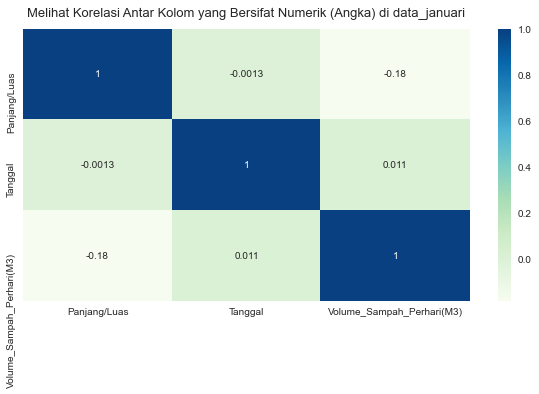

In [31]:
# Melihat korelasi antar kolom yang memiliki bersifat numerik
plt.figure(figsize=(10, 5))

korelasi_data = sns.heatmap(data_januari.corr(), cmap="GnBu", annot=True)
korelasi_data.set_title("Melihat Korelasi Antar Kolom yang Bersifat Numerik (Angka) di data_januari", fontsize=13, pad=13);

Grafik diatas dinamakan sebagai grafik heatmap atau grafik peta panas dengan menunjukkan nilai korelasi antar masing-masing kolom yang bersifat numerik sedangkan kategorik tidak. Cara membaca grafik ini yaitu membaca dari sumbu y ke sumbu x atau sebaliknya dengan memfokuskan/memperhatikan nilai yang ada di box persegi sebagai penanda nilai korelasinya. Contohnya adalah sebagai berikut:

1. Variabel Panjang/Luas yang ada di sumbu y memiliki nilai korelasi 1 dengan variabel yang sama (Panjang/Luas) yang berada di sumbu x. Sedangkan variabel Panjang/Luas yang ada di sumbu y memiliki nilai korelasi -0.0013 dengan variabel Tanggal yang ada di sumbu x. Hal tersebut menandakan tidak memiliki hubungan timbal-balik tetapi sedikit memiliki hubungan timbal-balik. Sedangkan variabel Panjang/Luas yang ada di sumbu y dengan variabel Volume_Sampah_Perhari(M3) sama sekali tidak memiliki hubungan timbal-balik karena nilai yang dihasilkan adalah -0.18.
2. Variabel Volume_Sampah_Perhari(M3) yang ada di sumbu y memiliki nilai korelasi = 0.0011 dengan variabel Tanggal yang ada di sumbu x. Sama seperti variabel Panjang/Luas dengan variabel Tanggal, di dalam kasus ini berarti variabel Volume_Sampah_Perhari(M3) sedikit memiliki hubungan timbal balik walaupun penilaian dominannya cenderung tidak memiliki hubungan timbal-balik.

Jadi intinya setiap kolom-kolom yang ada di sumbu y (yang berada di sisi kiri) dibaca/diperhatikan setiap nilainya dengan kolom-kolom yang berada di sumbu x (yang berada di bawah). Untuk memudahkan dalam membedakan apakah nilai korelasinya bagus/tidak dapat dilihat dari indikator warna yang di sebelah paling kanan dari grafik heatmap. Semakin bagus nilai korelasinya maka warnanya menjadi biru tua tetapi semakin buruk/kecil nilai korelasinya maka nilai warna pada box persegi di nilai tersebut menjadi warna putih.

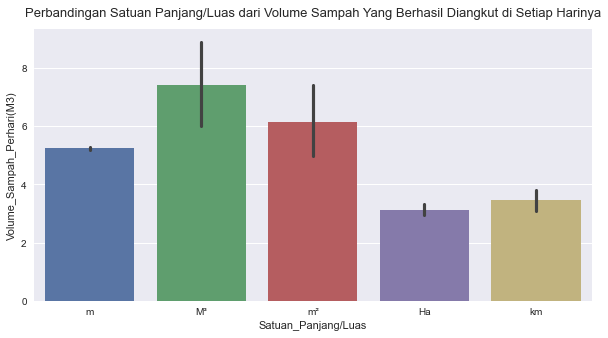

In [32]:
# Membandingkan nilai data di kolom "Satuan_Panjang/Luas" berdasarkan volume sampah yang berhasil diangkut per harinya
plt.figure(figsize=(10, 5))

sns.barplot(x="Satuan_Panjang/Luas", y="Volume_Sampah_Perhari(M3)", data=data_januari)
plt.title("Perbandingan Satuan Panjang/Luas dari Volume Sampah Yang Berhasil Diangkut di Setiap Harinya", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik bar pada hasil output diatas dapat diketahui dan diambil kesimpulan seperti:

1. Data yang memiliki nilai dominan dari kolom satuan panjang/luas yang dilihat berdasarkan volume sampah yang berhasil diangkut di setiap harinya adalah nilai M³ yang disusul oleh nilai m².
2. Sedangkan nilai satuan panjang/luas yang memiliki nilai terkecil adalah nilai hektar yang dilambangkan dengan Ha.

Untuk susunan nilai dari yang terbanyak hingga terkecil adalah sebagai berikut:
- M³.
- m².
- m.
- km.
- Ha.

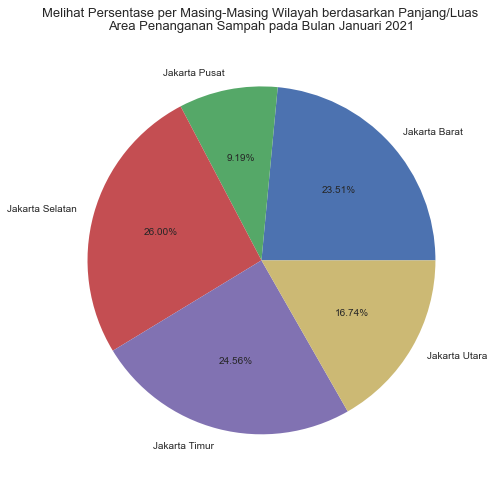

In [33]:
# Melihat komposisi masing-masing wilayah Provinsi DKI Jakarta berdasarkan panjang/luas area penanganan sampah
plt.figure(figsize=(10, 8))

data_pie_januari = data_januari.groupby("Wilayah")["Panjang/Luas"].sum().reset_index()
plt.pie(data_pie_januari["Panjang/Luas"], labels = data_pie_januari["Wilayah"], autopct = "%.2f%%")
plt.title("Melihat Persentase per Masing-Masing Wilayah berdasarkan Panjang/Luas \n"
          "Area Penanganan Sampah pada Bulan Januari 2021",
          fontsize=13, pad=13)
plt.show()

Grafik Pie merupakan sebuah grafik yang berfungsi untuk menunjukkan komposisi dari data yang bersifat kategorik dengan memperlihatkan nilai presentase dari masing-masing data dan jumlah total presentase tersebut harus 100% (tidak boleh lebih/kurang).

Berdasarkan grafik pie diatas maka saya dapat menganalisis komposisi data dari kolom Wilayah berdasarkan perhitungan keseluruhan atau nilai SUM dari kolom Panjang/Luas yang dihitung berdasarkan wilayah dari Provinsi DKI Jakarta. Kolom Panjang/Luas ini merupakan sebuah kolom yang menandakan seberapa luasnya area penanganan sampah yang dilakukan oleh Dinas Lingkungan Hidup (DLH) Provinsi DKI Jakarta. Berikut adalah hasil analisa dari saya:

1. Wilayah yang memiliki area penanganan yang paling luas dalam menangani sampah di Provinsi DKI Jakarta adalah wilayah Jakarta Selatan dengan persentase sebesar 26.00%.
2. Sedangkan wilayah Jakarta Pusat memiliki area penanganan sampah yang paling kecil dan sempit diantara wilayah-wilayah yang lain (seperti wilayah Jakarta Selatan (26.00%), Jakarta Utara (16.74%), Jakarta Timur (24.56%), dan Jakarta Barat (23.51%)) dengan total persentase hanya 9.19% dalam sisi luas area penanganan sampah.

## 4. Data Modelling

### 4.1. Pra-Pemodelan

In [34]:
# Melakukan pemisahan data menjadi variabel independen (x) dan variabel dependen (y)
x = data_januari[["Tanggal"]]

y = data_januari["Volume_Sampah_Perhari(M3)"]

Sebelum melakukan proses prediksi dengan model machine learning, saya akan membuat 2 teknik validasi supaya saya bisa membandingkannya mana yg lebih baik. Teknik validasi yang akan saya gunakan adalah split validation dan k fold cross validation.

#### 4.1.1. Menggunakan Split Validation dalam Melakukan Prediksi Model Regresi Linear (4.2) dan Regresi Random Forest (4.3)

In [35]:
# Proses split validation yaitu membagi variabel independen dan dependen menjadi data training dan data testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

Penjelasan dari proses split validation:

1. x: Merupakan sebuah variabel independen atau variabel yang dipengaruhi dari variabel dependen
2. y: Merupakan sebuah variabel dependen atau variabel yang mempengaruhi variabel independen. Variabel y juga biasa dikenal sebagai label prediksi.
3. test_size: Nilai presentase atau komposisi dari dalam membagi data menjadi data training dan data testing. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari data test mencapai 20% dan data train mencapai 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya. Namun jika ditentukan nilai random_statenya maka data akan diacak secara random.

In [36]:
# Melihat ukuran dimensi dari kolom dan rows dari data training dan data testing
print("Jumlah Rows dan Kolom di Data Training Setelah Dilakukan Split Validation: ", x_train.shape, y_train.shape)
print("Jumlah Rows dan Kolom di Data Testing Setelah Dilakukan Split Validation: ", x_test.shape, y_test.shape)

Jumlah Rows dan Kolom di Data Training Setelah Dilakukan Split Validation:  (35042, 1) (35042,)
Jumlah Rows dan Kolom di Data Testing Setelah Dilakukan Split Validation:  (8761, 1) (8761,)


In [37]:
# Melakukan scaling data (training & testing) dengan standard scaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

StandardScaler merupakan salah satu dari proses scaling data ketika ingin melakukan tahapan pemodelan machine learning. StandardScaler akan melakukan proses standarisasi data yang ada di kolom fitur dengan mengurangi nilai mean (rata-rata) dan kemudian nilai tersebut akan diskalakan ke varians unit. Nilai yang ada di varians unit tersebut akan membagi semua nilai yang ada dengan nilai standar deviasi.

StandardScaler akan membuat nilai mean (rata-rata) yang telah di observasi menjadi 0 sedangkan nilai standar deviasinya menjadi 1. Begitu pula dengan nilai varians yang menjadi 1 karena nilai varians = nilai standar deviasi yang di kuadratkan. Rumus dari scaling data StandardScaler adalah sebagai berikut:

x_scaled = x - mean(x) / Standard Deviation

In [38]:
# Melihat hasil dari proses scalling dengan standardscaler
print("Nilai Scaling dari Hasil StandardScaler pada Data Testing: \n", x_test)

print("\n", "----------------------------------------------------------------------------", "\n")

print("Nilai Scaling dari Hasil StandardScaler pada Data Training: \n", x_train)

Nilai Scaling dari Hasil StandardScaler pada Data Testing: 
 [[-1.11750135e+00]
 [ 8.94782017e-01]
 [-1.45288191e+00]
 ...
 [ 6.71194976e-01]
 [-8.93914312e-01]
 [ 4.33852266e-04]]

 ---------------------------------------------------------------------------- 

Nilai Scaling dari Hasil StandardScaler pada Data Training: 
 [[-1.22997308]
 [ 0.78253262]
 [ 1.56517373]
 ...
 [-1.00636133]
 [-0.11191435]
 [ 1.00614437]]


### 4.2. Regresi Linear

In [39]:
# Memanggil model regresi linear dari library sklearn dan kemudian melatihnya dengan data training
from sklearn.linear_model import LinearRegression

split_linear_regression_jan = LinearRegression()
split_linear_regression_jan.fit(x_train, y_train)

# Melihat nilai terbaik beserta parameter dari model regresi linear
print(split_linear_regression_jan.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


Berdasarkan hasil output terkait pencarian parameter terbaik dari model regresi linear didapatkan beberapa kesimpulan diantaranya:

1. Pada parameter copy_X, nilai terbaik dari parameter ini adalah True.
2. Di dalam parameter fit_intercept, parameter ini memiliki nilai terbaik yakni nilai True.
3. Parameter n_jobs tidak memiliki nilai karena nilai yang dimunculkan adalah None (Kosong).
4. Nilai terbaik dari parameter normalize adalah deprecated.
5. Sedangkan nilai terbaik dari parameter positive adalah False.

Nilai-nilai tersebut merupakan nilai terbaik dari model regresi linear yang dimunculkan secara otomatis sebab dari awal regresi linear memang telah memiliki nilai-nilai diatas. Nilai-nilai tersebut bisa dilihat di dokumentasi scikit learn dalam pembahasan regresi linear.

In [40]:
# Melihat nilai prediksi dari data training dan data testing setelah dilakukan proses tuning hyperparameters
print("----------------Nilai Prediksi dari Data Testing------------------")
pred_test_linear_jan = split_linear_regression_jan.predict(x_test)
print(pred_test_linear_jan)

print("\n----------------Nilai Prediksi dari Data Training-----------------")
pred_train_linear_jan = split_linear_regression_jan.predict(x_train)
print(pred_train_linear_jan)

----------------Nilai Prediksi dari Data Testing------------------
[4.69050319 4.73985449 4.68227797 ... 4.73437101 4.69598666 4.71792058]

----------------Nilai Prediksi dari Data Training-----------------
[4.68774481 4.73710157 4.75629587 ... 4.6932289  4.71516523 4.74258566]


In [41]:
# Melihat hasil prediksi regresi linear dari data testing dan juga data training

print("----------------------------Data Testing dari Split Validation----------------------------")
print("Nilai Metric Mean Absolute Error di Data Test adalah: ", "%.2f" % mean_absolute_error
      (y_test, pred_test_linear_jan))
print("Nilai Metric Mean Squared Error di Data Test adalah: ", "%.2f" % mean_squared_error
      (y_test, pred_test_linear_jan), "\n")
#print("Nilai Metric Mean Squared Log Error di Data Test Adalah: ", "%.2f" % mean_squared_log_error(y_test, pred_test_linear))

print("----------------------------Data Training dari Split Validation---------------------------")
print("Nilai Metric Mean Absolute Error di Data Train adalah: ", "%.2f" % mean_absolute_error
      (y_train, pred_train_linear_jan))
print("Nilai Metric Mean Squared Error di Data Train adalah: ", "%.2f" % mean_squared_error
      (y_train, pred_train_linear_jan))
#print("Nilai Metric Mean Squared Log Error Adalah: ", "%.2f" % mean_squared_log_error(y_train, pred_train_linear))

----------------------------Data Testing dari Split Validation----------------------------
Nilai Metric Mean Absolute Error di Data Test adalah:  3.30
Nilai Metric Mean Squared Error di Data Test adalah:  21.72 

----------------------------Data Training dari Split Validation---------------------------
Nilai Metric Mean Absolute Error di Data Train adalah:  3.20
Nilai Metric Mean Squared Error di Data Train adalah:  19.12


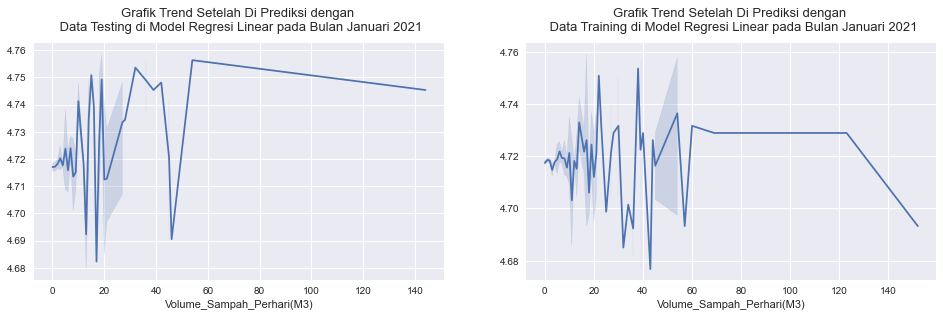

In [42]:
# Membuat grafik untuk melihat trend data dari volume pengangkutan sampah setelah dilakukan proses pemodelan regresi linear
plt.figure(figsize=(25, 20))

# Grafik untuk melihat trend data testing setelah dilakukan proses pemodelan regresi linear
plt.subplot(4, 3, 1)
sns.lineplot(y_test, pred_test_linear_jan)
plt.title("Grafik Trend Setelah Di Prediksi dengan \n Data Testing di Model Regresi Linear pada Bulan Januari 2021", 
          fontsize=13, pad=13)

# Grafik untuk melihat trend data training setelah dilakukan proses pemodelan regresi linear
plt.subplot(4, 3, 2)
sns.lineplot(y_train, pred_train_linear_jan)
plt.title("Grafik Trend Setelah Di Prediksi dengan \n Data Training di Model Regresi Linear pada Bulan Januari 2021", 
          fontsize=13, pad=13)
plt.show()

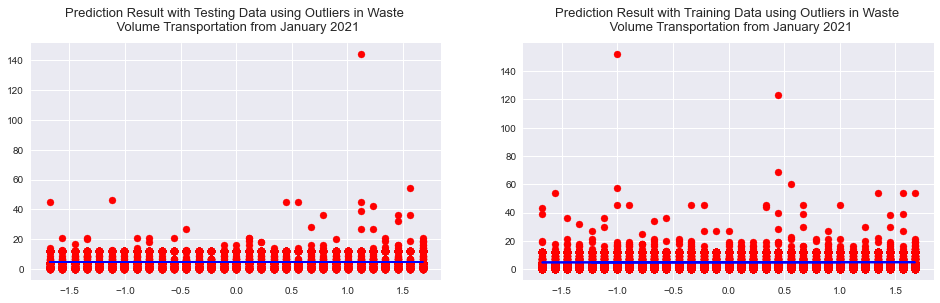

In [43]:
"""
Melihat korelasi/hubungan keterkaitan terhadap data testing dan data training 
setelah dilakukan proses prediksi menggunakan algoritma regresi linear
"""
plt.figure(figsize=(25, 20))

plt.subplot(4, 3, 1)
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, pred_test_linear_jan, color="blue")
plt.title("Prediction Result with Testing Data using Outliers in Waste \n Volume Transportation from January 2021", 
          fontsize=13, pad=13)

plt.subplot(4, 3, 2)
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, pred_train_linear_jan, color="blue")
plt.title("Prediction Result with Training Data using Outliers in Waste \n Volume Transportation from January 2021", 
          fontsize=13, pad=13)
plt.show()

#### 4.1.2. Menggunakan K-Fold Cross Validation dalam Melakukan Prediksi Model Regresi Linear

##### 4.1.2.1. Nilai K-Fold = 5

In [44]:
# Memanggil library K-Fold Cross Validation yang telah dipanggil diawal pemrosesan
kfold_5 = KFold(n_splits=5, random_state=37, shuffle=True)
kfold_5

KFold(n_splits=5, random_state=37, shuffle=True)

K-Fold Cross Validation memiliki 3 parameters yaitu n_splits, shuffle, dan random_state. Berikut adalah penjelasan dari parameters di teknik k-fold cross validation adalah sebagai berikut:

1. n_splits: parameter ini berfungsi sebagai lipatan dalam memvalidasi sebuah data. Jika n_split yang dibuat 5 maka terdapat 5 iterasi dalam memvalidasi serta juga melatih data sebanyak 5x pemrosesan dan setiap iterasi tersebut akan memiliki 5 baris untuk pengujiannya.
2. shuffle: parameter ini berfungsi untuk mengacak data sebelum dipecah ke beberapa iterasi (sesuai n_splits yang dibuat).
3. random_state: parameter terakhir yang dimiliki oleh teknik k-fold cross validation adalah random_state. Parameter ini berfungsi dalam mempengaruhi urutan indeks yang telah diacak (ketika nilai dari parameter shuffle di setting True) dan juga mengontrol keacakan dari setiap iterasi yang dilakukan.

In [45]:
"""
Membuat model regresi linear + nilai parameter deafult yang 
kemudian akan diimplementasikan ke nilai 5 pada teknik k-fold cross validation
"""

kfold_linear_regression_jan_5 = LinearRegression()
kfold_linear_regression_jan_5.fit(x_train, y_train)

LinearRegression()

In [46]:
# Melihat metrics-metrics yang bisa digunakan untuk memprediksi model machine learning
import sklearn

print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

Diatas adalah metrics-metrics yang bisa digunakan dalam melihat hasil prediksi yang telah dibangun oleh model machine learning. Untuk pengujian kali ini saya akan menggunakan metrics yang bernama neg_mean_absolute_error dan neg_mean_squared_error.

In [47]:
# Memanggil library cross_val_score untuk memvalidasi data training dan data test menggunakan metrics MAE & MSE

# Metric MAE untuk Data Training dan Data Testing
mae_score_kfold_train_jan_5 = cross_val_score(kfold_linear_regression_jan_5, x_train, y_train, 
                                              scoring="neg_mean_absolute_error", cv=kfold_5, n_jobs=1)

mae_score_kfold_test_jan_5 = cross_val_score(kfold_linear_regression_jan_5, x_test, y_test, 
                                             scoring="neg_mean_absolute_error", cv=kfold_5, n_jobs=1)

# Metric MSE untuk Data Training dan Data Testing
mse_score_kfold_train_jan_5 = cross_val_score(kfold_linear_regression_jan_5, x_train, y_train, 
                                              scoring="neg_mean_squared_error", cv=kfold_5, n_jobs=1)

mse_score_kfold_test_jan_5 = cross_val_score(kfold_linear_regression_jan_5, x_test, y_test, 
                                             scoring="neg_mean_squared_error", cv=kfold_5, n_jobs=1)

In [48]:
# Melihat nilai dari setiap iterasi dari metrics mean absolute error dan mean squared error

print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mae_score_kfold_train_jan_5, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mae_score_kfold_test_jan_5, "\n")
print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mse_score_kfold_train_jan_5, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mse_score_kfold_test_jan_5)

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-3.22579143 -3.22455545 -3.19231676 -3.17609792 -3.1916854 ] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-3.4594915  -3.40768651 -3.31323288 -3.3440699  -3.35710748] 

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-18.49554761 -18.90587066 -21.2256987  -17.33354352 -19.6510155 ] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-32.3590912  -20.00107718 -17.70812572 -18.70656056 -19.69729774]


In [49]:
# Melihat hasil prediksi data test dan data train dengan metric MAE & MSE dari hasil K-Fold Cross Validation

print("---------------------------------Data Testing K-Fold----------------------------------")
print("Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mae_score_kfold_test_jan_5)))
print("Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mse_score_kfold_test_jan_5)), "\n")

print("---------------------------------Data Training K-Fold----------------------------------")
print("Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mae_score_kfold_train_jan_5)))
print("Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mse_score_kfold_train_jan_5)))

---------------------------------Data Testing K-Fold----------------------------------
Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: 3.38 
Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: 21.69  

---------------------------------Data Training K-Fold----------------------------------
Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: 3.20 
Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: 19.12 


##### 4.1.2.2. Nilai K-Fold = 10

In [50]:
# Memanggil library K-Fold Cross Validation yang telah dipanggil diawal pemrosesan
kfold_10 = KFold(n_splits=10, random_state=37, shuffle=True)
kfold_10

KFold(n_splits=10, random_state=37, shuffle=True)

In [51]:
"""
Membuat model regresi linear + nilai parameter deafult yang 
kemudian akan diimplementasikan ke nilai 10 pada teknik k-fold cross validation
"""

kfold_linear_regression_jan_10 = LinearRegression()
kfold_linear_regression_jan_10.fit(x_train, y_train)

LinearRegression()

In [52]:
# Memanggil library cross_val_score untuk memvalidasi data training dan data test menggunakan metrics MAE & MSE

# Metric MAE untuk Data Training dan Data Testing
mae_score_kfold_train_jan_10 = cross_val_score(kfold_linear_regression_jan_10, x_train, y_train, 
                                               scoring="neg_mean_absolute_error", cv=kfold_10, n_jobs=1)

mae_score_kfold_test_jan_10 = cross_val_score(kfold_linear_regression_jan_10, x_test, y_test, 
                                              scoring="neg_mean_absolute_error", cv=kfold_10, n_jobs=1)

# Metric MSE untuk Data Training dan Data Testing
mse_score_kfold_train_jan_10 = cross_val_score(kfold_linear_regression_jan_10, x_train, y_train, 
                                               scoring="neg_mean_squared_error", cv=kfold_10, n_jobs=1)

mse_score_kfold_test_jan_10 = cross_val_score(kfold_linear_regression_jan_10, x_test, y_test, 
                                              scoring="neg_mean_squared_error", cv=kfold_10, n_jobs=1)

In [53]:
# Melihat nilai dari setiap iterasi dari metrics mean absolute error dan mean squared error

print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mae_score_kfold_train_jan_10, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mae_score_kfold_test_jan_10, "\n")
print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mse_score_kfold_train_jan_10, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mse_score_kfold_test_jan_10)

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-3.29164354 -3.1694827  -3.26697199 -3.18847988 -3.17497084 -3.21589525
 -3.15120159 -3.18692742 -3.14443262 -3.23151515] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-3.5034347  -3.41821453 -3.39251785 -3.44210263 -3.37030266 -3.26378649
 -3.2406536  -3.42120699 -3.41009409 -3.29543582] 

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-20.11498727 -16.87866235 -19.1364882  -18.68417351 -23.75792023
 -18.69837931 -17.41995524 -17.24128013 -17.04111982 -22.26140567] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-41.37486486 -23.30558226 -19.34384759 -20.64238762 -17.746927
 -17.66853414 -17.82915672 -19.56851529 -20.59171065 -18.78588536]


In [54]:
# Melihat hasil prediksi data test dan data train dengan metric MAE & MSE dari hasil K-Fold Cross Validation

print("---------------------------------Data Testing K-Fold----------------------------------")
print("Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mae_score_kfold_test_jan_10)))
print("Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mse_score_kfold_test_jan_10)), "\n")

print("---------------------------------Data Training K-Fold----------------------------------")
print("Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mae_score_kfold_train_jan_10)))
print("Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mse_score_kfold_train_jan_10)))

---------------------------------Data Testing K-Fold----------------------------------
Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: 3.38 
Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: 21.69  

---------------------------------Data Training K-Fold----------------------------------
Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: 3.20 
Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: 19.12 


##### 4.1.2.3. Nilai K-Fold = 15

In [55]:
# Memanggil library K-Fold Cross Validation yang telah dipanggil diawal pemrosesan
kfold_15 = KFold(n_splits=15, random_state=37, shuffle=True)
kfold_15

KFold(n_splits=15, random_state=37, shuffle=True)

In [56]:
"""
Membuat model regresi linear + nilai parameter deafult yang 
kemudian akan diimplementasikan ke nilai 15 pada teknik k-fold cross validation
"""

kfold_linear_regression_jan_15 = LinearRegression()
kfold_linear_regression_jan_15.fit(x_train, y_train)

LinearRegression()

Diatas adalah metrics-metrics yang bisa digunakan dalam melihat hasil prediksi yang telah dibangun oleh model machine learning. Untuk pengujian kali ini saya akan menggunakan metrics yang bernama neg_mean_absolute_error dan neg_mean_squared_error.

In [57]:
# Memanggil library cross_val_score untuk memvalidasi data training dan data test menggunakan metrics MAE & MSE

# Metric MAE untuk Data Training dan Data Testing
mae_score_kfold_train_jan_15 = cross_val_score(kfold_linear_regression_jan_15, x_train, y_train, 
                                               scoring="neg_mean_absolute_error", cv=kfold_15, n_jobs=1)

mae_score_kfold_test_jan_15 = cross_val_score(kfold_linear_regression_jan_15, x_test, y_test, 
                                              scoring="neg_mean_absolute_error", cv=kfold_15, n_jobs=1)

# Metric MSE untuk Data Training dan Data Testing
mse_score_kfold_train_jan_15 = cross_val_score(kfold_linear_regression_jan_15, x_train, y_train, 
                                               scoring="neg_mean_squared_error", cv=kfold_15, n_jobs=1)

mse_score_kfold_test_jan_15 = cross_val_score(kfold_linear_regression_jan_15, x_test, y_test, 
                                              scoring="neg_mean_squared_error", cv=kfold_15, n_jobs=1)

In [58]:
# Melihat nilai dari setiap iterasi dari metrics mean absolute error dan mean squared error

print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mae_score_kfold_train_jan_15, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mae_score_kfold_test_jan_15, "\n")
print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mse_score_kfold_train_jan_15, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mse_score_kfold_test_jan_15)

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-3.31806288 -3.20187804 -3.17518393 -3.24001845 -3.25717596 -3.1878192
 -3.16970562 -3.19132742 -3.22729972 -3.10223588 -3.19287657 -3.20614818
 -3.11927706 -3.19616676 -3.24546761] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-3.6263377  -3.36308326 -3.39419727 -3.42941807 -3.3619991  -3.46915956
 -3.41211763 -3.21921921 -3.32512916 -3.28848837 -3.24750239 -3.44645183
 -3.29538045 -3.37166778 -3.38796816] 

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-20.37559078 -18.01636948 -17.08824543 -19.06170246 -17.88726112
 -19.77809935 -17.70944855 -26.68363426 -19.29079221 -16.42521438
 -17.91076306 -17.65494471 -16.66289034 -18.49746228 -23.79427858] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-53.37067538 -20.15789804 -23.45100143 -20.20972733 -18.47224779
 -21.29456573 -18.10958915 -16.46385018 -18.56930659 -18.71652713
 -16.92625819 -20.

In [59]:
# Melihat hasil prediksi data test dan data train dengan metric MAE & MSE dari hasil K-Fold Cross Validation

print("---------------------------------Data Testing K-Fold----------------------------------")
print("Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mae_score_kfold_test_jan_15)))
print("Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mse_score_kfold_test_jan_15)), "\n")

print("---------------------------------Data Training K-Fold----------------------------------")
print("Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mae_score_kfold_train_jan_15)))
print("Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mse_score_kfold_train_jan_15)))

---------------------------------Data Testing K-Fold----------------------------------
Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: 3.38 
Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: 21.68  

---------------------------------Data Training K-Fold----------------------------------
Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: 3.20 
Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: 19.12 


### 4.3. Regresi Random Forest

Setelah memprediksi menggunakan model regresi linear, selanjutnya saya akan memprediksi tingkat pengangkutan sampah per harinya menggunakan model regresi random forest.

In [60]:
# Memanggil model regresi random forest dari library sklearn
from sklearn.ensemble import RandomForestRegressor

split_randomforest_regression_jan = RandomForestRegressor()
split_randomforest_regression_jan.fit(x_train, y_train)

# Melihat parameter dari regresi random forest beserta nilai terbaik dari masing-masing parameter
print(split_randomforest_regression_jan.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Berdasarkan hasil output terkait pencarian parameter terbaik dari model regresi linear didapatkan beberapa kesimpulan diantaranya:

1. Pada parameter bootstrap, nilai terbaik dari parameter ini adalah True.
2. Di dalam parameter ccp_alpha, parameter ini memiliki nilai terbaik yakni nilai 0.0.
3. Parameter criterion memiliki nilai terbaik yakni squared_error.
4. Parameter max_depth tidak memiliki nilai karena nilai yang dimunculkan adalah None (Kosong).
5. Di dalam parameter max_features, parameter ini memiliki nilai terbaik yakni nilai auto.
6. Di dalam parameter max_leaf_nodes tidak memiliki nilai karena nilai yang dimunculkan adalah None (Kosong).
7. Di dalam parameter max_samples tidak memiliki nilai karena nilai yang dimunculkan adalah None (Kosong).
7. Di dalam parameter min_impurity_decrease, parameter ini memiliki nilai terbaik yakni nilai 0.0.
8. Nilai terbaik dari parameter min_samples_leaf adalah 1.
9. Nilai terbaik dari parameter min_samples_split adalah 2.
10. Pada parameter min_weight_fraction_leaf, nilai yang muncul adalah nilai 0.0.
11. Di parameter n_estimators, nilai yang muncul pada parameter ini adalah 100.
12. Pada parameter n_jobs, nilai yang muncul adalah nilai None.
13. Pada parameter oob_score, nilai yang muncul adalah nilai False.
14. Pada parameter random_state, nilai yang muncul adalah nilai None.
15. Di parameter verbose, nilai yang muncul pada parameter ini adalah 0.
16. Sedangkan nilai yang muncul dari parameter warm_start adalah False.

Nilai-nilai tersebut merupakan nilai terbaik dari model regresi random forest yang dimunculkan secara otomatis sebab dari awal regresi random forest telah memiliki nilai-nilai diatas sebagai nilai default. Nilai-nilai tersebut bisa dilihat di dokumentasi scikit learn dalam pembahasan regresi random forest (random forest regressor).

In [61]:
# Melihat nilai prediksi dari data training dan data testing setelah dilakukan proses pencarian nilai parameters terbaik
print("----------------Nilai Prediksi dari Data Testing------------------")
pred_test_randomforest_jan = split_randomforest_regression_jan.predict(x_test)
print(pred_test_randomforest_jan)

print("\n---------------Nilai Prediksi dari Data Training-----------------")
pred_train_randomforest_jan = split_randomforest_regression_jan.predict(x_train)
print(pred_train_randomforest_jan)

----------------Nilai Prediksi dari Data Testing------------------
[4.61146413 4.60199515 4.78981103 ... 4.71899075 4.64642629 4.89150201]

---------------Nilai Prediksi dari Data Training-----------------
[4.55888311 4.7280865  4.67568522 ... 4.77981663 4.72705163 4.47050429]


In [62]:
# Melihat hasil prediksi regresi random forest dari data testing dan juga data training

print("----------------------------Data Testing dari Split Validation----------------------------")
print("Nilai Metric Mean Absolute Error di Data Test adalah: ", "%.2f" % mean_absolute_error
      (y_test, pred_test_randomforest_jan))
print("Nilai Metric Mean Squared Error di Data Test adalah: ", "%.2f" % mean_squared_error
      (y_test, pred_test_randomforest_jan), "\n")
#print("Nilai Metric Mean Squared Log Error di Data Test Adalah: ", "%.2f" % mean_squared_log_error(y_test, pred_test_linear))

print("----------------------------Data Training dari Split Validation---------------------------")
print("Nilai Metric Mean Absolute Error di Data Train adalah: ", "%.2f" % mean_absolute_error
      (y_train, pred_train_randomforest_jan))
print("Nilai Metric Mean Squared Error di Data Train adalah: ", "%.2f" % mean_squared_error
      (y_train, pred_train_randomforest_jan))
#print("Nilai Metric Mean Squared Log Error Adalah: ", "%.2f" % mean_squared_log_error(y_train, pred_train_linear))

----------------------------Data Testing dari Split Validation----------------------------
Nilai Metric Mean Absolute Error di Data Test adalah:  3.30
Nilai Metric Mean Squared Error di Data Test adalah:  21.73 

----------------------------Data Training dari Split Validation---------------------------
Nilai Metric Mean Absolute Error di Data Train adalah:  3.20
Nilai Metric Mean Squared Error di Data Train adalah:  19.10


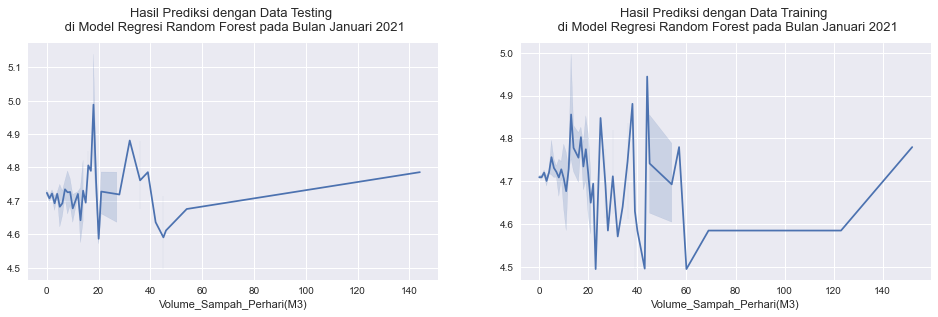

In [63]:
# Membuat grafik untuk melihat trend data dari volume pengangkutan sampah setelah melalui proses pemodelan regresi random forest
plt.figure(figsize=(25, 20))

# Grafik untuk melihat trend data testing setelah dilakukan proses pemodelan regresi random forest
plt.subplot(4, 3, 1)
sns.lineplot(y_test, pred_test_randomforest_jan)
plt.title("Hasil Prediksi dengan Data Testing \n di Model Regresi Random Forest pada Bulan Januari 2021", 
          fontsize=13, pad=13)

# Grafik untuk melihat trend data training setelah dilakukan proses pemodelan regresi random forest
plt.subplot(4, 3, 2)
sns.lineplot(y_train, pred_train_randomforest_jan)
plt.title("Hasil Prediksi dengan Data Training \n di Model Regresi Random Forest pada Bulan Januari 2021", 
          fontsize=13, pad=13)
plt.show()

#### 4.1.3. Menggunakan K-Fold Cross Validation dalam Melakukan Prediksi Model Regresi Random Forest

##### 4.1.3.1. Nilai K-Fold = 5

In [64]:
# Memanggil library K-Fold Cross Validation yang telah dipanggil diawal pemrosesan
kfold_5 = KFold(n_splits=5, random_state=37, shuffle=True)
kfold_5

KFold(n_splits=5, random_state=37, shuffle=True)

K-Fold Cross Validation memiliki 3 parameters yaitu n_splits, shuffle, dan random_state. Berikut adalah penjelasan dari parameters di teknik k-fold cross validation adalah sebagai berikut:

1. n_splits: parameter ini berfungsi sebagai lipatan dalam memvalidasi sebuah data. Jika n_split yang dibuat 5 maka terdapat 5 iterasi dalam memvalidasi serta juga melatih data sebanyak 5x pemrosesan dan setiap iterasi tersebut akan memiliki 5 baris untuk pengujiannya.
2. shuffle: parameter ini berfungsi untuk mengacak data sebelum dipecah ke beberapa iterasi (sesuai n_splits yang dibuat).
3. random_state: dan parameter terakhir yang dimiliki oleh teknik k-fold cross validation adalah random_state. Parameter ini berfungsi dalam mempengaruhi urutan indeks yang telah diacak (ketika nilai dari parameter shuffle di setting True) dan juga mengontrol keacakan dari setiap iterasi yang dilakukan.

In [65]:
"""
Membuat model regresi random forest + nilai parameter deafult yang 
kemudian akan diimplementasikan ke nilai 5 pada teknik k-fold cross validation
"""

kfold_randomforest_regression_jan_5 = RandomForestRegressor()
kfold_randomforest_regression_jan_5.fit(x_train, y_train)

RandomForestRegressor()

In [66]:
"""
Memanggil library cross_val_score untuk memvalidasi data training dan data test di model regresi random forest 
dengan menggunakan metrics MAE & MSE
"""

# Metric MAE untuk Data Training dan Data Testing
mae_score_kfold_train_jan_5 = cross_val_score(kfold_randomforest_regression_jan_5, x_train, y_train, 
                                              scoring="neg_mean_absolute_error", cv=kfold_5, n_jobs=1)

mae_score_kfold_test_jan_5 = cross_val_score(kfold_randomforest_regression_jan_5, x_test, y_test, 
                                             scoring="neg_mean_absolute_error", cv=kfold_5, n_jobs=1)

# Metric MSE untuk Data Training dan Data Testing
mse_score_kfold_train_jan_5 = cross_val_score(kfold_randomforest_regression_jan_5, x_train, y_train, 
                                              scoring="neg_mean_squared_error", cv=kfold_5, n_jobs=1)

mse_score_kfold_test_jan_5 = cross_val_score(kfold_randomforest_regression_jan_5, x_test, y_test, 
                                             scoring="neg_mean_squared_error", cv=kfold_5, n_jobs=1)

In [67]:
# Melihat nilai dari setiap iterasi dari metrics mean absolute error dan mean squared error

print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mae_score_kfold_train_jan_5, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mae_score_kfold_test_jan_5, "\n")
print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mse_score_kfold_train_jan_5, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mse_score_kfold_test_jan_5)

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-3.2260102  -3.22272408 -3.19083518 -3.17382442 -3.18572242] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-3.45685345 -3.41593295 -3.31232283 -3.34836425 -3.36142922] 

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-18.50358005 -18.89825741 -21.25578875 -17.32983451 -19.66280034] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-32.42383184 -20.05036936 -17.7414524  -18.85569651 -19.76539835]


In [68]:
# Melihat hasil prediksi data test dan data train dengan metric MAE & MSE dari hasil K-Fold Cross Validation

print("---------------------------------Data Testing K-Fold----------------------------------")
print("Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mae_score_kfold_test_jan_5)))
print("Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mse_score_kfold_test_jan_5)))

print("\n", "---------------------------------Data Training K-Fold----------------------------------")
print("Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mae_score_kfold_train_jan_5)))
print("Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mse_score_kfold_train_jan_5)))

---------------------------------Data Testing K-Fold----------------------------------
Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: 3.38 
Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: 21.77 

 ---------------------------------Data Training K-Fold----------------------------------
Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: 3.20 
Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: 19.13 


##### 4.1.3.2. Nilai K-Fold = 10

In [69]:
# Memanggil library K-Fold Cross Validation yang telah dipanggil diawal pemrosesan
kfold_10 = KFold(n_splits=10, random_state=37, shuffle=True)
kfold_10

KFold(n_splits=10, random_state=37, shuffle=True)

In [70]:
"""
Membuat model regresi random forest + nilai parameter deafult yang 
kemudian akan diimplementasikan ke nilai 10 pada teknik k-fold cross validation
"""
kfold_randomforest_regression_jan_10 = RandomForestRegressor()
kfold_randomforest_regression_jan_10.fit(x_train, y_train)

RandomForestRegressor()

In [71]:
"""
Memanggil library cross_val_score untuk memvalidasi data training dan data test di model regresi random forest 
dengan menggunakan metrics MAE & MSE
"""

# Metric MAE untuk Data Training dan Data Testing
mae_score_kfold_train_jan_10 = cross_val_score(kfold_randomforest_regression_jan_10, x_train, y_train,
                                               scoring="neg_mean_absolute_error", cv=kfold_10, n_jobs=1)

mae_score_kfold_test_jan_10 = cross_val_score(kfold_randomforest_regression_jan_10, x_test, y_test, 
                                              scoring="neg_mean_absolute_error", cv=kfold_10, n_jobs=1)

# Metric MSE untuk Data Training dan Data Testing
mse_score_kfold_train_jan_10 = cross_val_score(kfold_randomforest_regression_jan_10, x_train, y_train, 
                                               scoring="neg_mean_squared_error", cv=kfold_10, n_jobs=1)

mse_score_kfold_test_jan_10 = cross_val_score(kfold_randomforest_regression_jan_10, x_test, y_test, 
                                              scoring="neg_mean_squared_error", cv=kfold_10, n_jobs=1)

In [72]:
# Melihat nilai dari setiap iterasi dari metrics mean absolute error dan mean squared error

print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mae_score_kfold_train_jan_10, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mae_score_kfold_test_jan_10, "\n")
print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mse_score_kfold_train_jan_10, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mse_score_kfold_test_jan_10)

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-3.28975348 -3.16987039 -3.26612291 -3.18570529 -3.17855808 -3.21501294
 -3.14641352 -3.18465047 -3.14268335 -3.23078749] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-3.50939995 -3.41775723 -3.40266236 -3.44249922 -3.36078296 -3.26501159
 -3.24480931 -3.4233688  -3.40493304 -3.30221059] 

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-20.14672629 -16.87909966 -19.1138341  -18.68258033 -23.80508574
 -18.73002424 -17.41595092 -17.25987399 -17.04694105 -22.28179246] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-41.45612231 -23.37815325 -19.39488033 -20.68161191 -17.75624487
 -17.73439481 -17.91327694 -19.78614949 -20.64801403 -18.85373628]


In [73]:
# Melihat hasil prediksi data test dan data train dengan metric MAE & MSE dari hasil K-Fold Cross Validation

print("---------------------------------Data Testing K-Fold----------------------------------")
print("Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mae_score_kfold_train_jan_10)))
print("Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mse_score_kfold_test_jan_10)))

print("\n", "---------------------------------Data Training K-Fold----------------------------------")
print("Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mae_score_kfold_train_jan_10)))
print("Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mse_score_kfold_train_jan_10)))

---------------------------------Data Testing K-Fold----------------------------------
Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: 3.20 
Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: 21.76 

 ---------------------------------Data Training K-Fold----------------------------------
Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: 3.20 
Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: 19.14 


##### 4.1.3.3. Nilai K-Fold = 15

In [74]:
# Memanggil library K-Fold Cross Validation yang telah dipanggil diawal pemrosesan
kfold_15 = KFold(n_splits=15, random_state=37, shuffle=True)
kfold_15

KFold(n_splits=15, random_state=37, shuffle=True)

In [75]:
"""
Membuat model regresi linear + nilai parameter deafult yang 
kemudian akan diimplementasikan ke nilai 15 pada teknik k-fold cross validation
"""

kfold_randomforest_regression_jan_15 = RandomForestRegressor()
kfold_randomforest_regression_jan_15.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
"""
Memanggil library cross_val_score untuk memvalidasi data training dan data test di model regresi random forest 
dengan menggunakan metrics MAE & MSE
"""

# Metric MAE untuk Data Training dan Data Testing
mae_score_kfold_train_jan_15 = cross_val_score(kfold_randomforest_regression_jan_15, x_train, y_train, 
                                               scoring="neg_mean_absolute_error", cv=kfold_15, n_jobs=1)

mae_score_kfold_test_jan_15 = cross_val_score(kfold_randomforest_regression_jan_15, x_test, y_test, 
                                              scoring="neg_mean_absolute_error", cv=kfold_15, n_jobs=1)

# Metric MSE untuk Data Training dan Data Testing
mse_score_kfold_train_jan_15 = cross_val_score(kfold_randomforest_regression_jan_15, x_train, y_train, 
                                               scoring="neg_mean_squared_error", cv=kfold_15, n_jobs=1)

mse_score_kfold_test_jan_15 = cross_val_score(kfold_randomforest_regression_jan_15, x_test, y_test, 
                                              scoring="neg_mean_squared_error", cv=kfold_15, n_jobs=1)

In [77]:
# Melihat nilai dari setiap iterasi dari metrics mean absolute error dan mean squared error

print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mae_score_kfold_train_jan_15, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mae_score_kfold_test_jan_15, "\n")
print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mse_score_kfold_train_jan_15, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mse_score_kfold_test_jan_15)

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-3.31654543 -3.20196952 -3.17943052 -3.23994244 -3.25229582 -3.18603373
 -3.17044917 -3.19812928 -3.22350374 -3.09534764 -3.19416967 -3.20247984
 -3.11788326 -3.19590207 -3.24178887] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-3.62558871 -3.3648909  -3.39930422 -3.43870288 -3.36947568 -3.47095541
 -3.40355307 -3.22713665 -3.33058229 -3.30143603 -3.25311525 -3.44326518
 -3.28966301 -3.38121533 -3.39310605] 

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-20.39811346 -18.00927211 -17.11101237 -19.04140798 -17.85831603
 -19.77116601 -17.7649622  -26.72092164 -19.30490594 -16.4010579
 -17.91434489 -17.66860427 -16.70452019 -18.47500917 -23.81230787] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-53.3602663  -20.17013635 -23.63028574 -20.21621655 -18.54110329
 -21.41415852 -18.05830392 -16.57990248 -18.62096564 -18.78275304
 -17.17281625 -20.

In [78]:
# Melihat hasil prediksi data test dan data train dengan metric MAE & MSE dari hasil K-Fold Cross Validation

print("---------------------------------Data Testing K-Fold----------------------------------")
print("Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mae_score_kfold_train_jan_15)))
print("Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mse_score_kfold_test_jan_15)))

print("\n", "---------------------------------Data Training K-Fold----------------------------------")
print("Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mae_score_kfold_train_jan_15)))
print("Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mse_score_kfold_train_jan_15)))

---------------------------------Data Testing K-Fold----------------------------------
Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: 3.20 
Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: 21.76 

 ---------------------------------Data Training K-Fold----------------------------------
Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: 3.20 
Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: 19.13 
